# Vehicle Dynamics - Electric Vehicle Design (Gowtham.S)

<font color = red>
This presentation is an excerpt from the lectures delivered by <b>Prof. Ashok Juhnjuhnwala, IIT Madras</b><br><br>
</font>

Key takeaways from the document would be as follows:
<ol>    
<li>Recap of forces acting on a vehicle and deciding on power and torque requirements for electric motor</li>
<li>Drive cycles - Indian Driving Cycle for 2 and 3 Wheelers</li>
<li>Energy consumption calculations</li>
</ol>

The notebook enables the readers to decide on power and torque requirements for the motor to propel a given vehicle. Also it enables to decide on the capacity of the battery pack required by calculating the energy consumption for the given vehicle.


### How much power is required to drive a vehicle ?

Vehicle needs <b>Traction Power</b> to move and accelerate. Computing the required traction power involves following steps

<ol>
        <li> Estimating the resistances / forces acting on a vehicle </li>
        <li> Defining maximum speed and acceleration of the vehicle </li>        
</ol>
    

#### <u>Aerodynamic Resistance</u>

In [13]:
import ipywidgets as widgets
from ipywidgets import Box,Layout
from ipywidgets import interactive
from ipywidgets import interactive_output,HBox,VBox
import matplotlib.pyplot as plt
import numpy as np
import math

style = {'description_width': 'initial'}

Velocity = widgets.FloatSlider(value=30,min=10,max=200,step=1,description="Velocity (V)",layout = Layout(width="39%"))
DragCoefficient = widgets.BoundedFloatText (value=0.9,min=0.1,max=1.5,step=0.1,description="Drag (Cd)")
FrontalArea = widgets.BoundedFloatText (value=0.6,min=0.6,max=2,step=0.1,description="Area (A)")
AirDensity = widgets.BoundedFloatText (value=1.2,min=0.6,max=2,step=0.1,description="Density (\u03C1)")

def AirResist(AirDensity,FrontalArea,DragCoefficient,Velocity):
    print("\033[1m"+"Air Resistance (N): "+'\033[0m',round(0.5 * AirDensity * FrontalArea * DragCoefficient * (Velocity/3.6)**2,3))

widgets.interact(AirResist,AirDensity = AirDensity,FrontalArea = FrontalArea,DragCoefficient = DragCoefficient,Velocity = Velocity)

interactive(children=(BoundedFloatText(value=1.2, description='Density (ρ)', max=2.0, min=0.6, step=0.1), Boun…

<function __main__.AirResist(AirDensity, FrontalArea, DragCoefficient, Velocity)>

#### <u>Rolling Resistance</u>


Rolling resistance co-efficient depends on the following factors
<ol>
    <li>Tyre material</li>
    <li>Tyre Structure</li>
    <li>Tyre Temperature</li>
    <li>Tyre Inflation Pressure</li>
    <li>Tread Geometry</li>
    <li>Road Roughness</li>
    <li>Presence of liquid / ice on roads</li>
</ol>
    At vehicle speeds less than 120 kmph, the rolling resistance co-efficient is also a function of velocity.<br>
<center><b>μ = μ<sub>o</sub> * (1 + V / 160)</b></center>


In [14]:
GVW = widgets.FloatSlider(value=200,min=10,max=4000,step=1,description="GVW (Kg)",layout = Layout(width="39%"))
Gradient = widgets.FloatSlider(value=5,min=0,max=90,step=0.5,description="Gradient (\u03B8)",layout = Layout(width="39%"),style=style)
FrictionCoefficient = widgets.BoundedFloatText (value=0.015,min=0,max=1,step=0.001,description="Friction Coefficient (\u03BC)",style=style)

def RollingResist(FrictionCoefficient,GVW,Gradient,Velocity):
    FrictionCoeffmitVelocity = FrictionCoefficient*(1+(Velocity/160))
    print("\033[1m"+"Rolling Resistance (N): "+'\033[0m',round(GVW * 9.81 * FrictionCoefficient * math.cos(Gradient * math.pi/180),3))
    print("\033[1m"+"Dynamic Rolling Resistance (N): "+'\033[0m',round(GVW * 9.81 * FrictionCoeffmitVelocity * math.cos(Gradient * math.pi/180),3))

widgets.interact(RollingResist,FrictionCoefficient = FrictionCoefficient,GVW = GVW,Gradient = Gradient,Velocity = Velocity)

interactive(children=(BoundedFloatText(value=0.015, description='Friction Coefficient (μ)', max=1.0, step=0.00…

<function __main__.RollingResist(FrictionCoefficient, GVW, Gradient, Velocity)>

In [15]:
def InteractRollingResistCoeff(Mu,Mass,Gradient):
    plt.rcParams['figure.figsize'] = [12,9]
    z = np.linspace(Velocity.min,120,100)
    DynamicRollingResist = Mu * (1 + z/160)
    RollingResist_withMu = Mass * 9.81 * DynamicRollingResist * math.cos(Gradient*math.pi/180)
    plt.subplot(2,3,1)
    plt.plot(z,DynamicRollingResist)
    plt.xlabel("Velocity (km/hr)")
    plt.ylabel("Rolling Friction Co-efficient")
    plt.subplot(2,3,3)
    plt.plot(z,RollingResist_withMu)
    plt.xlabel("Velocity (km/hr)")
    plt.ylabel("Dynamic Rolling Resistance")
    plt.show()
    
Graph1 = interactive_output(InteractRollingResistCoeff,{"Mu":FrictionCoefficient,"Mass":GVW,"Gradient":Gradient})
display(FrictionCoefficient,Graph1)

BoundedFloatText(value=0.015, description='Friction Coefficient (μ)', max=1.0, step=0.001, style=DescriptionSt…

Output()

#### <u> Gradient Resistance </u>

Generally gradient is restricted to 12&deg.

In [16]:
def GradientResist (GVW,Gradient):
    GradientResist = round(GVW * 9.81 * math.sin(Gradient * math.pi/180),3)
    print("\033[1m"+"Gradient Resistance (N): "+'\033[0m',GradientResist)

widgets.interact(GradientResist,GVW = GVW, Gradient = Gradient)

interactive(children=(FloatSlider(value=200.0, description='GVW (Kg)', layout=Layout(width='39%'), max=4000.0,…

<function __main__.GradientResist(GVW, Gradient)>

#### <u>Power required for acceleration Acceleration (Pick-up)</u>

The force required to accelerate the vehicle from 0 to final velocity (V<sub>f</sub>) assuming uniform linear acceleration is given by the relationship
    <center> <b>F<sub>a</sub> = GVW * V<sub>f</sub> / Time to reach final velocity</b> </center><br>
    The work spent in accelerating the vehicle is given by the relationship
    <center> <b>W = F<sub>a</sub> * Displacement of the vehicle position </b> </center><br>
    where,<br>
    <center> <b>Change in vehicle position due to acceleration = 0.5 * a * T<sup>2</sup></b></center><br>
    <center> <b> Average acceleration power (P<sub>avg</sub>) = W / T </b> </center>  <br>
    <center> <b>P<sub>avg</sub> =  0.5 * GVW * V<sub>f</sub> <sup>2</sup> / T </b> </center><br>
    <center> <b> Peak Power Required = 2 * P<sub>avg</sub> </b></center>


In [17]:
style = {'description_width': 'initial'}
Time = widgets.FloatSlider(value=20,min=2,max=60,step=1,description="Time (s)",layout = Layout(width="39%"))
WheelRadius = widgets.FloatSlider(value=0.28,min=0.01,max=0.5,step=0.01,description="Wheel Radius (m)",style=style,layout = Layout(width="39%"))
def InteracAccelerationPower(GVW,Velocity,Time,WheelRadius):
    AccelerationForce = round(GVW * ((Velocity/3.6) / Time),3)
    RequiredTorque = round(AccelerationForce * WheelRadius)
    AveragePower = round(0.5 * GVW * ((Velocity/3.6)**2 / Time/1000),3)
    PeakPower = round(2*AveragePower,3)
    print("\033[1m"+"Acceleration Force (N): "+'\033[0m',AccelerationForce)
    print("\033[1m"+"Required Torque (Nm): "+'\033[0m',RequiredTorque)
    print("\033[1m"+"Average Power (kW): "+'\033[0m',AveragePower)
    print("\033[1m"+"Peak Power (kW): "+'\033[0m',PeakPower)

widgets.interact(InteracAccelerationPower,GVW=GVW,Velocity = Velocity, Time = Time,WheelRadius = WheelRadius)

interactive(children=(FloatSlider(value=200.0, description='GVW (Kg)', layout=Layout(width='39%'), max=4000.0,…

<function __main__.InteracAccelerationPower(GVW, Velocity, Time, WheelRadius)>

In [18]:
def InteractAccelForce(GVW,Time,WheelRadius):
    plt.rcParams['figure.figsize'] = [12,9]
    a = np.linspace(Velocity.min,Velocity.max,100)
    AccelerationForce = GVW * ((a/3.6) / Time)
    RequiredTorque = AccelerationForce * WheelRadius
    AveragePower = 0.5 * GVW * ((a/3.6)**2 / Time/1000)
    PeakPower = 2*AveragePower
    plt.subplot(2,3,1)
    plt.plot(a,AccelerationForce)
    plt.xlabel("Velocity (km/hr)")
    plt.ylabel("Acceleration Force (N)")
    plt.subplot(2,3,3)
    plt.plot(a,AveragePower)
    plt.xlabel("Velocity (km/hr)")
    plt.ylabel("Average Power (W)")
    plt.show()
    
Graph2 = interactive_output(InteractAccelForce,{"GVW":GVW,"Time":Time,"WheelRadius":WheelRadius})
display(GVW,Time,Graph2)

FloatSlider(value=200.0, description='GVW (Kg)', layout=Layout(width='39%'), max=4000.0, min=10.0, step=1.0)

FloatSlider(value=20.0, description='Time (s)', layout=Layout(width='39%'), max=60.0, min=2.0, step=1.0)

Output()

Deciding on the intended acceleration levels is crucial for selection of the motor. Let us consider the top speed of the vehicle is around 150 kmph. In case if we must reach the speed within 20 seconds, the required average power will be approximately equal to 347 W, but if we have to reach the speed twice as fast we need around 694 W. This is known as doubling of power as a result of linear acceleration.<br>
    
In order to mitigate this behavior, we tend to have a high level of acceleration in the beginning of the drive and decrease it once the vehicle is in a state of motion. Let us look at the visualization given below:


#### Note
<ol>
<li>For a given vehicle, the gradient resistance component is high compared to the aerodynamic drag and rolling resistance.</li>
<li>The aerodynamic resistance component equals to the gradient resistance only when the vehicle speed is greater than 100 kmph.</li>
<li> Therefore, as a rule of thumb we can infer that at low speeds rolling resistance and air resistance would be negligible compared to the Gradient resistance</li>
</ol>

---

The required force to move the given vehicle is called <b>Tractive Force</b> and it the sum of rolling, gradient and aerodynamic resistance. This force would be the minimum force required to maintain the state of motion of the vehicle. If further acceleration is required, then another component called Acceleration force comes into the picture.<br>
    
The traction force varies as the square of the velocity whereas the required traction power varies as the cube of its velocity.
    <center><b> Traction Power = Traction Force * Velocity </b></center>


In [19]:
def TractiveForce (GVW,Gradient,Velocity,FrictionCoefficient,AirDensity,FrontalArea,DragCoefficient):
    TractiveForce = round(round(GVW * 9.81 * math.sin(Gradient * math.pi/180),3) + round(GVW * 9.81 * FrictionCoefficient * math.cos(Gradient * math.pi/180),3) + round(0.5 * AirDensity * FrontalArea * DragCoefficient * (Velocity/3.6)**2,3))
    TractionPower = round(TractiveForce * Velocity/3.6)
    print("\033[1m"+"Tractive Force (N): "+'\033[0m',TractiveForce)
    print("\033[1m"+"Traction Power (W): "+'\033[0m',TractionPower)

widgets.interact(TractiveForce,GVW=GVW,Gradient=Gradient,Velocity=Velocity,FrictionCoefficient=FrictionCoefficient,AirDensity=AirDensity,FrontalArea=FrontalArea,DragCoefficient=DragCoefficient)

interactive(children=(FloatSlider(value=200.0, description='GVW (Kg)', layout=Layout(width='39%'), max=4000.0,…

<function __main__.TractiveForce(GVW, Gradient, Velocity, FrictionCoefficient, AirDensity, FrontalArea, DragCoefficient)>

In [20]:
def InteracTractForce (GVW,Gradient,FrictionCoefficient,AirDensity,FrontalArea,DragCoefficient):
    plt.rcParams['figure.figsize'] = [12,9]
    x = np.linspace(Velocity.min,Velocity.max,100)
    TractiveForce = (GVW * 9.81 * math.sin(Gradient * math.pi/180)) + (GVW * 9.81 * FrictionCoefficient * math.cos(Gradient * math.pi/180)) + (0.5 * AirDensity * FrontalArea * DragCoefficient * (x/3.6)**2)
    TractionPower = TractiveForce * (x/3.6) / 1000
    plt.subplot(2,3,1)
    plt.plot(x,TractiveForce)
    plt.xlabel("Velocity (km/hr)")
    plt.ylabel("Tractive Force (N)")
    plt.subplot(2,3,3)
    plt.xlabel("Velocity (km/hr)")
    plt.ylabel("Traction Power (kW)")
    plt.plot(x,TractionPower)
    plt.show()
    
interactive_plot2=interactive_output(InteracTractForce,{"GVW":GVW,"Gradient":Gradient,"FrictionCoefficient":FrictionCoefficient,"AirDensity":AirDensity,"FrontalArea":FrontalArea,"DragCoefficient":DragCoefficient})
vbox1 = HBox([GVW])
vbox3 = HBox([Gradient])
vbox2 = HBox([FrictionCoefficient, AirDensity,FrontalArea,DragCoefficient])
vbox = VBox([vbox2,vbox3,vbox1])
display(vbox)
display(interactive_plot2)

Output()

#### <u> Putting it all together </u>

 <ol>
    <li>The aerodynamic resistance or drag is not a function of mass of the vehicle and therefore the trend looks the same in case of 2 / 3 / 4 wheelers</li>
    <li>The gradient resistance dominates more than rolling resistance and drag at lower speeds. Only at higher speeds, the dominance fades off.</li>
    <li>The force required for accelerating the vehicle is less when the intended final velocity after the time T is low.</li>
        <li> If a vehicle continues to move with a uniform velocity on a flat road, the requirement for power to overcome gradient and accerlerate dies off. However power required to overcome rolling resistance and air resistance is required always. </li>
        <li>The power required for overcoming rolling and gradient resistance is slightly under 1kW for the given vehicle for speeds upto 90 kmph. However the power to accelerate and overcome air resistance grows rapidly upto 5kW</li>
        <li> The power to overcome gradient and accelerate are not needed together. Climbing is usually done at lower speeds and therefore this can help us to better decide on the power rating of the motor instead of simply summing up the components.
        <li> Power requirement is low at lower velocities but the torque requirement cannot be considered as a function of velocity because the torque required to overcome gradient resistance is very high even at lower speeds.
    </ol>
    
    

In [21]:
def Consolidate(GVW,Gradient,FrictionCoefficient,AirDensity,FrontalArea,DragCoefficient,Time,WheelRadius):
    v= np.linspace(0,70,70)
    x=np.ones(70)
    GradResist = (GVW * 9.81 * math.sin(Gradient * math.pi/180)) * x
    RollResist = (GVW * 9.81 * FrictionCoefficient * math.cos(Gradient * math.pi/180)) * x
    AerodynamicDrag  = (0.5 * AirDensity * FrontalArea * DragCoefficient * (v/3.6)**2)
    AccForce = GVW * ((v/3.6) / Time)
    GradPow = (GradResist * v / (3 * 3.6)) / 1000
    RollPow = RollResist * (v / 3.6) / 1000
    AirPow = AerodynamicDrag * (v/3.6) / 1000
    AccPow = 0.5 * GVW * ((v/3.6)**2 / Time/1000)
    GradTorq = GradResist * WheelRadius
    RollTorq = RollResist * WheelRadius
    AirTorq = AerodynamicDrag * WheelRadius
    AccTorq = AccForce * WheelRadius
    plt.rcParams['figure.figsize'] = [25,20]
    plt.subplot(2,3,1)
    plt.plot(v,GradResist,label="Gradient Resistance")
    plt.plot(v,RollResist,label="Rolling Resistance")
    plt.plot(v,AerodynamicDrag,label="Air Resistance")   
    plt.plot(v,AccForce,label="Acceleration Force")   
    plt.xlabel("Velocity (km/hr)")
    plt.ylabel("Force Required (N)")
    plt.legend(loc = "upper left")
    plt.subplot(2,3,2)
    plt.plot(v,GradPow,label="Power for Gradient Resistance")
    plt.plot(v,RollPow,label="Power for Rolling Resistance")
    plt.plot(v,AirPow,label="Power for Air Resistance")   
    plt.plot(v,AccPow,label="Power for Acceleration")       
    plt.xlabel("Velocity (km/hr)")
    plt.ylabel("Power Required (W)")
    plt.legend(loc = "upper left")
    plt.subplot(2,3,3)
    plt.plot(v,GradTorq,label="Torque for Gradient Resistance")
    plt.plot(v,RollTorq,label="Torque for Rolling Resistance")
    plt.plot(v,AirTorq,label="Torque for Gradient Resistance")
    plt.plot(v,AccTorq,label="Torque for Acceleration")
    plt.xlabel("Velocity (km/hr)")
    plt.ylabel("Torque Required (N-m)")
    plt.legend(loc = "upper left")
    plt.show()
    
Graph4 = interactive_output(Consolidate,{"GVW":GVW,"Gradient":Gradient,"FrictionCoefficient":FrictionCoefficient,"AirDensity":AirDensity,"FrontalArea":FrontalArea,"DragCoefficient":DragCoefficient,"Time":Time,"WheelRadius":WheelRadius})
display(Graph4)

Output()

### <u> Concept of Drivetrain </u>

A drivetrain is required to deliver the required power and torque to overcome air, gradient and rolling resistance and also to provide right pick-up (acceleration).<br> <br>
    Once the required power for each component is known, we could calculate the average power and peak power. This should be the power rating of the motor and for deciding on the torque rating, the forces computed above must be multiplied with the tire radius and then must be decided. The next challenge will be to design the heat dissipation for the motor. Generally the heat dissipation will be designed for the average power or rated power. <br> <br>
    In order to facilitate comparison between different vehicles on the grounds of energy consumption, driving cycles are used. A typical Indian Driving Cycle is shown below:


Distance Covered (m) :  658


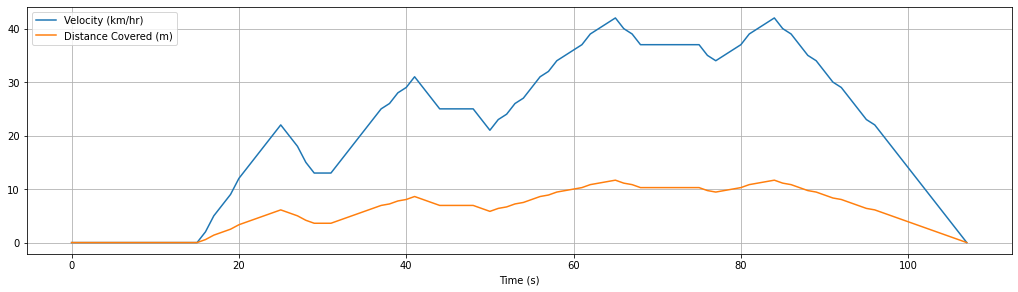

In [22]:
t = np.arange(0,108,1)
V1 = np.zeros(16)
V2 = np.array([2,5,7,9,12,14])
V3 = np.array([16,18,20,22])
V4 = np.array([20,18,15,13])
V5 = np.array([13,13])
V6 = np.array([15,17,19,21,23])
V7 = np.array([25,26,28,29,31])
V8 = np.array([29,27,25])
V9 = np.array([25,25,25,25])
V10 = np.array([23,21])
V11 = np.array([23,24,26,27,29,31,32,34])
V12 = np.array([35,36,37,39,40,41,42])
V13 = np.array([40,39,37])
V14 = np.array([37,37,37,37,37,37,37])
V15 = np.array([35,34])
V16 = np.array([35,36,37,39,40,41,42])
V17 = np.array([40,39,37,35,34,32,30,29,27])
V18 = np.array([25,23,22,20,18,16,14])
V19 = np.array([12,10,8,6,4,2,0])
V = np.concatenate((V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19), axis=None)
dt=np.diff(t)
dt = np.hstack([0,dt])
dv=np.diff(V)
dv=np.hstack([0,dv])
s = (V/3.6) * dt
a = np.divide((dv/3.6),dt,out=np.zeros_like((dv/3.6)), where=dt!=0)
plt.rcParams['figure.figsize'] = [60,10]
plt.subplot(2,3,1)
fig1 = plt.plot(t,V,label = "Velocity (km/hr)")
plt.xlabel("Time (s)")
fig2 = plt.plot(t,s,label = "Distance Covered (m)")
plt.xlabel("Time (s)")
plt.grid()
plt.legend(loc = "upper left")
Dist = np.sum(s)
print("\033[1m"+"Distance Covered (m) : "+'\033[0m',round(Dist))

In [24]:
R = widgets.FloatSlider(value=0.5,min=0,max=1,step=0.1,description="Regen Efficiency (s)",style=style)

def Graphy(GVW,Gradient,FrictionCoefficient,AirDensity,FrontalArea,DragCoefficient,Time,WheelRadius,R):
    x = np.ones(108)
    a = np.divide((dv/3.6),dt,out=np.zeros_like((dv/3.6)), where=dt!=0)
    Fa= GVW * a
    Fr = (GVW * 9.81 * (FrictionCoefficient * (1+(V/160))) * math.cos(Gradient * math.pi/180)) * x
    Fd = (0.5 * AirDensity * FrontalArea * DragCoefficient * (V/3.6)**2)
    Ftrac = Fa+Fr+Fd
    Ptrac = Ftrac * (V/3.6)
    Etrac = np.where(Ftrac < 0, 0, (Ftrac * (V/3.6) * (dt/3600)))
    Eregen = np.where(Ftrac <0,Ftrac * R * (V/3.6) * (dt/3600),(Ftrac * (V/3.6) * (dt/3600)))
    Eregen_sum = np.sum((Eregen))
    Eperkm = Eregen_sum / (Dist/1000)
    Etrac_sum = np.sum(Etrac)
    Etracperkm = Etrac_sum/(Dist/1000)
    print("\033[1m"+"Energy Consumed with Regeneration"+'\033[0m')
    print ("\033[1m"+"Energy Consumed (W-h) : "+'\033[0m',round(Eregen_sum,2))
    print("\033[1m"+"Energy Consumed per km (W-h) : "+'\033[0m',round(Eperkm,2))
    print("---------------------------------------")
    print("\033[1m"+"Energy Consumed without Regeneration"+'\033[0m')
    print ("\033[1m"+"Energy Consumed (W-h) : "+'\033[0m',round(Etrac_sum,2))
    print("\033[1m"+"Energy Consumed per km (W-h) : "+'\033[0m',round(Etracperkm,2))    
    
    Torque = Ftrac * WheelRadius
    
    Eregen_list = Eregen.tolist()
    Ewithoutregen_list = Etrac.tolist()
    Eregen_Integ=[]
    Ewithoutregen_Integ = []
    for i in range(0,len(Eregen_list)):
        if(i==0):
            Eregen_Integ.append(Eregen_list[i])
            Ewithoutregen_Integ.append(Ewithoutregen_list[i])
        else:
            Eregen_list[i] = Eregen_list[i]+Eregen_list[i-1]
            Ewithoutregen_list[i] = Ewithoutregen_list[i]+Ewithoutregen_list[i-1]
            Eregen_Integ.append(Eregen_list[i])
            Ewithoutregen_Integ.append(Ewithoutregen_list[i])
            
    Eregen_Integ = np.array(Eregen_Integ,dtype = "object")
    Ewithoutregen_Integ = np.array(Ewithoutregen_Integ,dtype="object")
    
    Range = np.arange(10,1000)
    BatCapRegen = (Range * Eperkm)/1000
    BatCapWithoutRegen = (Range * Etracperkm)/1000
    
    plt.rcParams['figure.figsize'] = [16,20]
    plt.subplot(511)
    plt.plot(t,Fa,label = "Acceleration Force")
    plt.plot(t,Fr,label = "Rolling Resistance")
    plt.plot(t,Fd,label = "Drag")
    plt.ylabel("Force (N)")
    plt.grid()
    plt.legend(loc = "lower left")
    plt.subplot(512)
    plt.plot(t,Torque,label = "Torque")
    plt.ylabel("Torque (Nm)")
    plt.grid()
    plt.subplot(513)
    plt.plot(t,Ptrac)
    plt.ylabel("Power (Nm/s)")
    plt.grid()
    plt.subplot(514)
    plt.plot(t,Ewithoutregen_Integ,label = "Energy Consumption without Regeneration")
    plt.plot(t,Eregen_Integ,label = "Energy Consumption with R% Regeneration")
    plt.ylabel("Energy Consumed (Wh)")
    plt.xlabel("Time (s)")
    plt.legend(loc="upper left")
    plt.grid()
    plt.subplot(515)
    plt.plot(Range,BatCapWithoutRegen,label = "Battery Capacity without Regeneration")
    plt.plot(Range,BatCapRegen,label = "Battery Capacity with Regeneration")
    plt.xlabel("Range")
    plt.ylabel("Capacity (kWh)")
    plt.legend(loc="upper left")
    plt.grid()
    plt.show()
      
Graph6=interactive_output(Graphy,{"GVW":GVW,"Gradient":Gradient,"FrictionCoefficient":FrictionCoefficient,"AirDensity":AirDensity,"FrontalArea":FrontalArea,"DragCoefficient":DragCoefficient,"Time":Time,"WheelRadius":WheelRadius,"R":R})
hbox1 = HBox([GVW,R])
display(Graph6,hbox1)

Output()

The above illustration has not accounted for the gradient resistance because the Indian Driving Cycle for 2 Wheelers and 3 Wheelers doesn't accomodate the gradient requirements. Also from the vehicle dynamics point of view, the amount of energy consumed can be lowered by increasing the regeneration efficiency, decreasing the gross vehicle weight and installing better tires to lower the effect of rolling resistance.    
